<h1 style="text-align:center"><b>Tugas Klastering Twitter</b></h1>

<hr>
<table>
    <tr>
        <td><b>NIM</b></td>
        <td>:</td>
        <td>20.01.53.0033</td>
    </tr>
    <tr>
        <td><b>Nama</b></td>
        <td>:</td>
        <td>MUHAMMAD FALAH ABDURRAFI</td>
    </tr>
    <tr>
        <td><b>Progdi</b></td>
        <td>:</td>
        <td>Teknik Informatika - S1</td>
    </tr>
    <tr>
        <td><b>Mata Kuliah</b></td>
        <td>:</td>
        <td>Text Mining</td>
    </tr>
    <tr>
        <td><b>Kelas</b></td>
        <td>:</td>
        <td>A1</td>
    </tr>
    <tr>
        <td><b>Dosen Pengampu</b></td>
        <td>:</td>
        <td>Dr. Drs. ERI ZULIARSO, M.Kom.</td>
    </tr>
</table>
<hr>

<br><br>
<h1><b>1. Scrapping (SNScrape)</b></h1>
<hr>

<h4><b>1.1. Import Library</b></h4>

In [1]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

<br>
<h4><b>1.2. Menentukan Kata Kunci</b></h4>

In [2]:
keywords=['pssi']
start="2022–09–01"
end ="2022–10–03"
max_num=20
fname='tweet.json' 
languages=['id','en']

<br>
<h4><b>1.3. Proses Scrapping</b></h4>

In [3]:
documents_twitter = []

for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
            
            documents_twitter.append(data['text'])
            
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                print(line)
                f.write(line)
                f.write('\n')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4344\3992385352.py:14: FutureWarning: username is deprecated, use user.username instead
  data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}


{"id": 1581214130673184769, "username": "EsTeh_2500", "date": "2022-10-15 09:23:20+00:00", "text": "@MafiaWasit Ketua asprov sekaligus Exco PSSI yo mbah 😅", "url": "https://twitter.com/EsTeh_2500/status/1581214130673184769"}
{"id": 1581214048267382785, "username": "MasJanoko8", "date": "2022-10-15 09:23:01+00:00", "text": "@Tan_Mar3M kan pssi dibawah fifa drun...cuma.himbauan.tidak bisa intervensi...arahnya tetap ke presiden yh salah..,kaum.iblis picek.matane.dobol.silite..😁😁😁", "url": "https://twitter.com/MasJanoko8/status/1581214048267382785"}
{"id": 1581213986737238016, "username": "Clarenceamadeus", "date": "2022-10-15 09:22:46+00:00", "text": "@dengkul_cacing @maret19841 @mamunmurod_ Kenapa emangnya? Ngasih komentar / tanggapan itu bukan keharusan. Jadi tidak bisa dipaksa. Lagipula dari awal saya paling nggak pengen tau komentar ketum PSSI, lebih ingin tahu komentar Panpel, pt LIB, atau polisi2 yg bertugas disitu", "url": "https://twitter.com/Clarenceamadeus/status/158121398673723

<br><br>
<h1><b>2. Preprocessing</b></h1>
<ul>
    <li>Case Folding</li>
    <li>Stemming</li>
    <li>Filtering (Stopword Remover)</li>
</ul>
<hr>

<h4><b>2.1. Import Library</b></h4>

In [4]:
import re
import string

<br>
<h4><b>2.2. Listing Utama</b></h4>

In [5]:
# Buat StemmerFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [6]:
# Buat StopWordRemover
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [7]:
documents_clean=[]

for d in documents_twitter:
  
  # BEGIN: Case Folding

  # Remove Unicode
  document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
  # Remove URL
  document_test = re.sub(r'http\S+', '', document_test)
  # Remove Mentions
  document_test = re.sub(r'@\w+', '', document_test)
  # Lowercase the document
  document_test = document_test.lower()
  # Remove punctuations
  document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
  # Lowercase the numbers
  document_test = re.sub(r'[0-9]', '', document_test)
  # Remove the doubled space
  outputcase = re.sub(r'\s{2,}', ' ', document_test)
    
  # END: Case Folding
    
  # Proses Stemming
  outputstem= stemmer.stem(outputcase)

  # Proses Filtering (StopwordRemover)
  outputstop= stopword.remove(outputstem)

  documents_clean.append(outputstop)

In [8]:
documents_clean[6]

'bubar aja ganti liga kasti'

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

<br><br>
<h1><b>3. Representasi Kata Sebagai Vektor </b></h1>
Pilih salah satu metode.
<hr>

<h4><b>3.1. Metode <i>TF-IDF Vectorizer</i></b></h4>

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

tfidf_wm = tfidf_wm.T.toarray()
frequency = pd.DataFrame(tfidf_wm, index=tfidf_tokens)

<br>
<h4><b>3.2. Metode <i>Count Vectorizer</i></b></h4>

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np # linear algebra

In [12]:
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

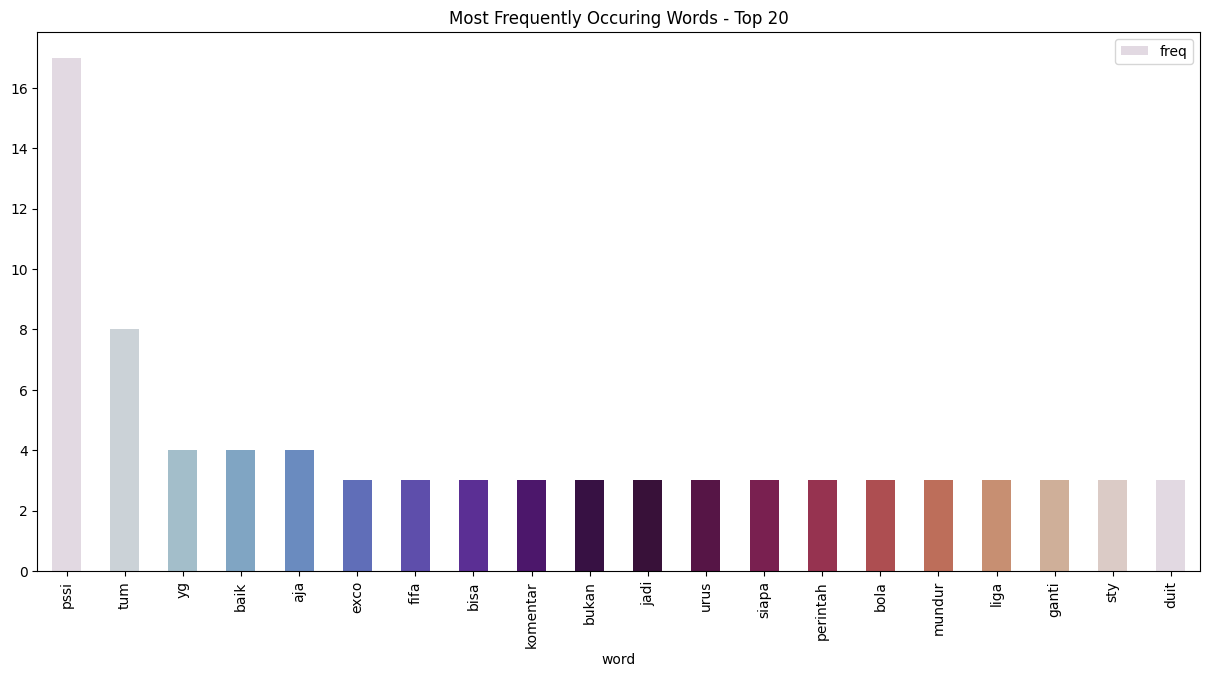

In [13]:
color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")